# Default of credit card clients Data Set

### Data Set Information:

This research aimed at the case of customersâ€™ default payments in Taiwan and compares the predictive accuracy of probability of default among six data mining methods. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. Because the real probability of default is unknown, this study presented the novel â€œSorting Smoothing Methodâ€ to estimate the real probability of default. With the real probability of default as the response variable (Y), and the predictive probability of default as the independent variable (X), the simple linear regression result (Y = A + BX) shows that the forecasting model produced by artificial neural network has the highest coefficient of determination; its regression intercept (A) is close to zero, and regression coefficient (B) to one. Therefore, among the six data mining techniques, artificial neural network is the only one that can accurately estimate the real probability of default.

### Attribute Information:

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:

X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
X2: Gender (1 = male; 2 = female).
X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
X4: Marital status (1 = married; 2 = single; 3 = others).
X5: Age (year).
X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: 
  X6 = the repayment status in September, 2005; 
  X7 = the repayment status in August, 2005; 
  . . .;
  X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
X12-X17: Amount of bill statement (NT dollar). 
  X12 = amount of bill statement in September, 2005; 
  X13 = amount of bill statement in August, 2005; 
  . . .; 
  X17 = amount of bill statement in April, 2005.
X18-X23: Amount of previous payment (NT dollar). 
  X18 = amount paid in September, 2005; 
  X19 = amount paid in August, 2005; 
  . . .;
  X23 = amount paid in April, 2005.


In [1]:
%matplotlib inline

import os
import json
import time
import pickle
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
URL = "http://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls"

def fetch_data(fname='./../data/cc_default/default_of_credit_card_clients.xls'):
    """
    Helper method to retreive the ML Repository dataset.
    """
    response = requests.get(URL)
    outpath  = os.path.abspath(fname)
    # using wb instead of w to fix issue with downloaded excel file on windows machine
    with open(outpath, 'wb') as f:
        f.write(response.content)
    
    return outpath

# Fetch the data if required
DATA = fetch_data()

In [3]:
DATA = "./../data/cc_default/default_of_credit_card_clients.xls"

FEATURES  = [
    "ID",
    "LIMIT_BAL",
    "SEX",
    "EDUCATION",
    "MARRIAGE",
    "AGE",
    "PAY_0",
    "PAY_2",
    "PAY_3",
    "PAY_4",
    "PAY_5",
    "PAY_6",
    "BILL_AMT1",
    "BILL_AMT2",
    "BILL_AMT3",
    "BILL_AMT4",
    "BILL_AMT5",
    "BILL_AMT6",
    "PAY_AMT1",
    "PAY_AMT2",
    "PAY_AMT3",
    "PAY_AMT4",
    "PAY_AMT5",
    "PAY_AMT6",
    "label"  
]

LABEL_MAP = {
    1: "Yes",
    0: "No",
}

# Read the data into a DataFrame
df = pd.read_excel(DATA,header=None, skiprows=2, names=FEATURES)

# Convert class labels into text
for k,v in LABEL_MAP.items():
    df.ix[df.label == k, 'label'] = v

# Describe the dataset
print df.describe()


                 ID       LIMIT_BAL           SEX     EDUCATION      MARRIAGE  \
count  30000.000000    30000.000000  30000.000000  30000.000000  30000.000000   
mean   15000.500000   167484.322667      1.603733      1.853133      1.551867   
std     8660.398374   129747.661567      0.489129      0.790349      0.521970   
min        1.000000    10000.000000      1.000000      0.000000      0.000000   
25%     7500.750000    50000.000000      1.000000      1.000000      1.000000   
50%    15000.500000   140000.000000      2.000000      2.000000      2.000000   
75%    22500.250000   240000.000000      2.000000      2.000000      2.000000   
max    30000.000000  1000000.000000      2.000000      6.000000      3.000000   

                AGE         PAY_0         PAY_2         PAY_3         PAY_4  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      35.485500     -0.016700     -0.133767     -0.166200     -0.220667   
std        9.217904      1.123802

In [4]:
df.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,label
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,Yes
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,Yes
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,No
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,No
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,No


In [5]:
# Determine the shape of the data
print "{} instances with {} features\n".format(*df.shape)

# Determine the frequency of each class
print df.groupby('label')['label'].count()

30000 instances with 25 features

label
No     23364
Yes     6636
Name: label, dtype: int64


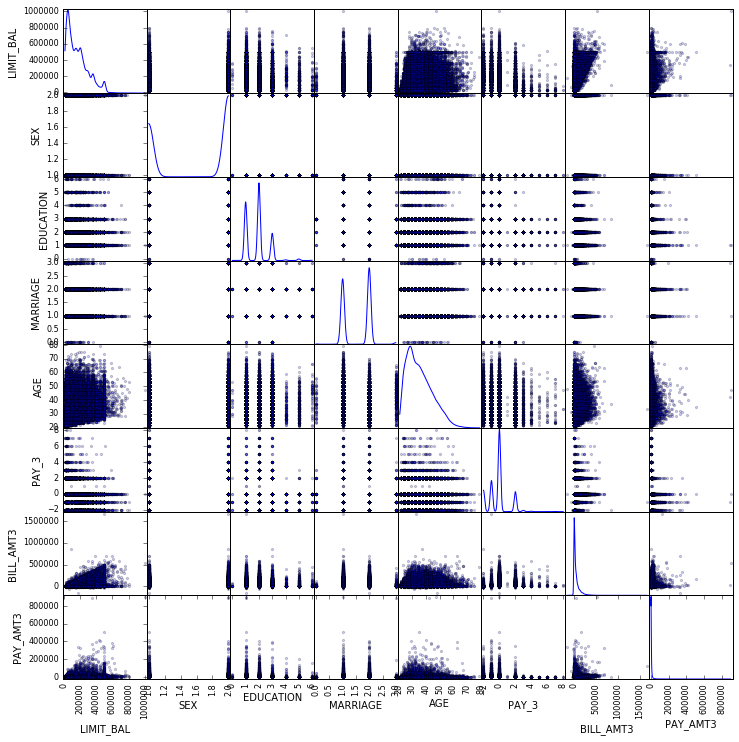

In [6]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(df.ix[:,("LIMIT_BAL","SEX","EDUCATION","MARRIAGE","AGE","PAY_3","BILL_AMT3","PAY_AMT3",)]
    , alpha=0.2, figsize=(12, 12), diagonal='kde')
plt.show()

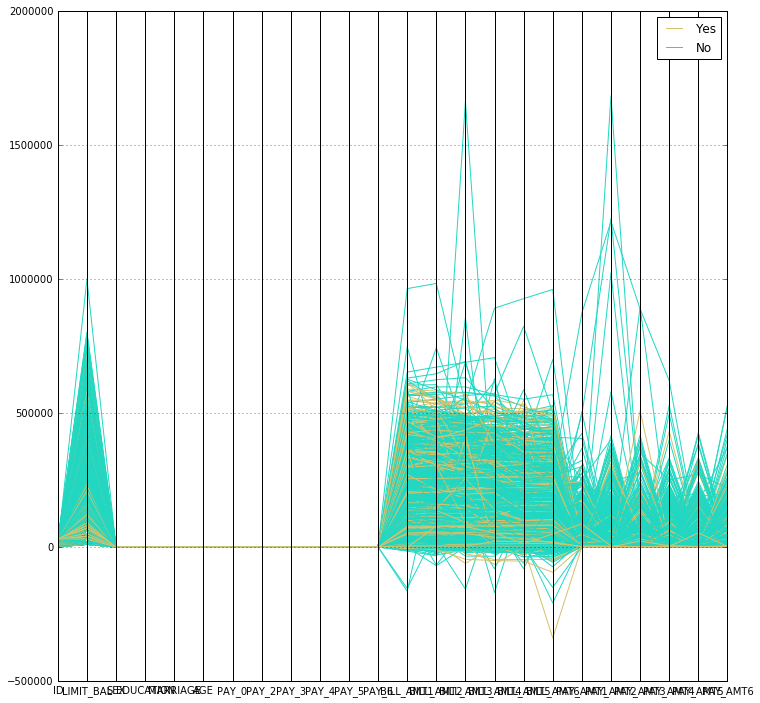

In [7]:
from pandas.tools.plotting import parallel_coordinates
plt.figure(figsize=(12,12))
parallel_coordinates(df, 'label')
plt.show()

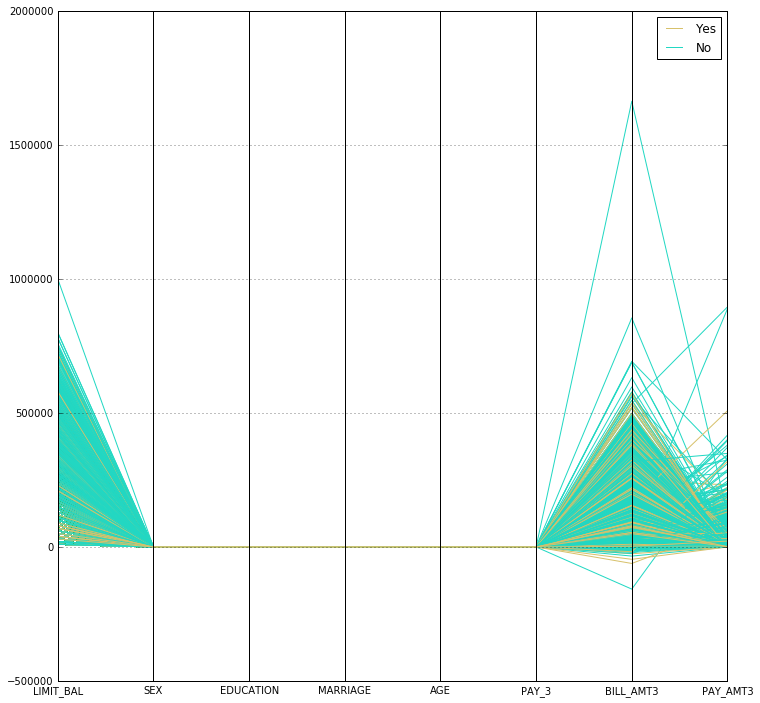

In [11]:
# Same figure type as above but with only specific features
from pandas.tools.plotting import parallel_coordinates
plt.figure(figsize=(12,12))
parallel_coordinates(df.ix[:,("LIMIT_BAL","SEX","EDUCATION","MARRIAGE","AGE","PAY_3","BILL_AMT3","PAY_AMT3","label")], 'label')
plt.show()

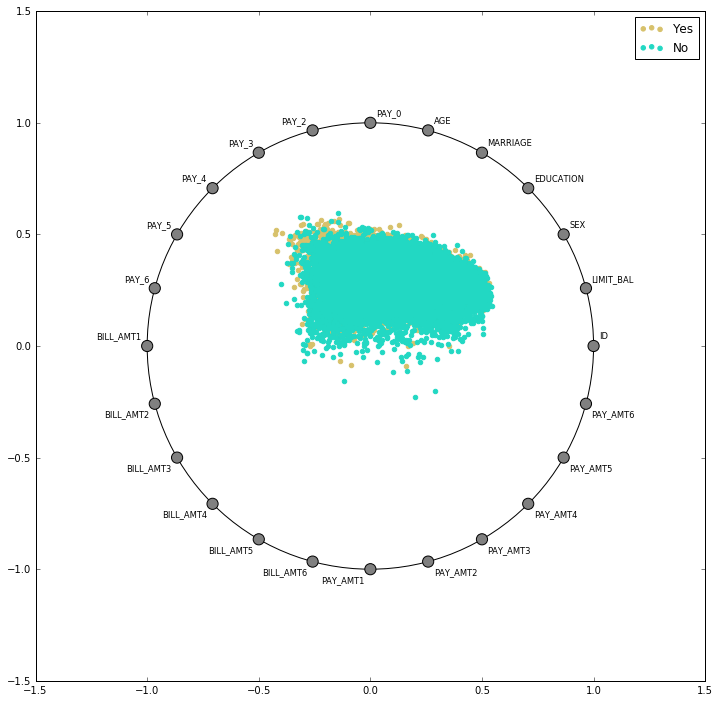

In [12]:
from pandas.tools.plotting import radviz
plt.figure(figsize=(12,12))
radviz(df, 'label')
plt.show()

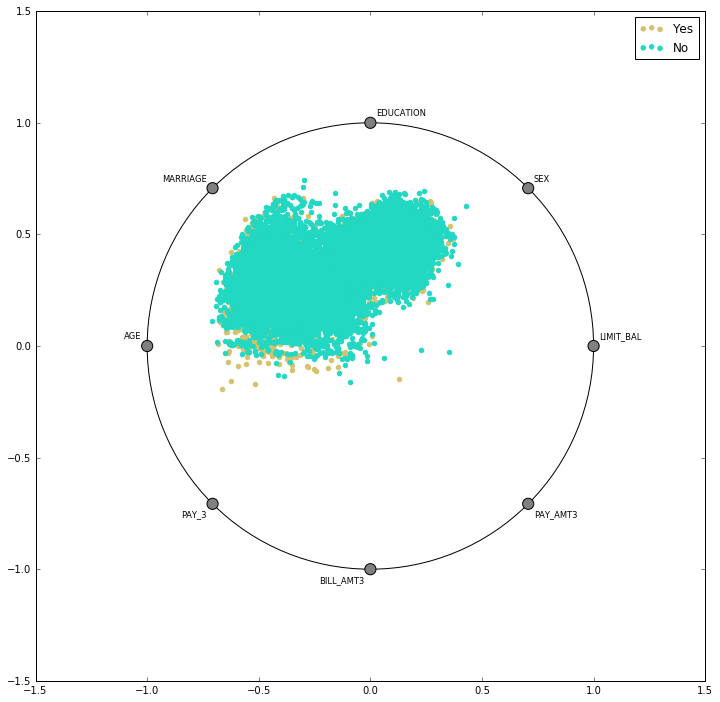

In [10]:
# Same figure type as above but with only specific features
from pandas.tools.plotting import radviz
plt.figure(figsize=(12,12))
radviz(df.ix[:,("LIMIT_BAL","SEX","EDUCATION","MARRIAGE","AGE","PAY_3","BILL_AMT3","PAY_AMT3","label")], 'label')
plt.show()

## Data Extraction 

One way that we can structure our data for easy management is to save files on disk. The Scikit-Learn datasets are already structured this way, and when loaded into a `Bunch` (a class imported from the `datasets` module of Scikit-Learn) we can expose a data API that is very familiar to how we've trained on our toy datasets in the past. A `Bunch` object exposes some important properties:

- **data**: array of shape `n_samples` * `n_features`
- **target**: array of length `n_samples`
- **feature_names**: names of the features
- **target_names**: names of the targets
- **filenames**: names of the files that were loaded
- **DESCR**: contents of the readme

**Note**: This does not preclude database storage of the data, in fact - a database can be easily extended to load the same `Bunch` API. Simply store the README and features in a dataset description table and load it from there. The filenames property will be redundant, but you could store a SQL statement that shows the data load. 

In order to manage our data set _on disk_, we'll structure our data as follows:

In [13]:
with open('./../data/cc_default/meta.json', 'w') as f:
        meta = {'feature_names': FEATURES, 'target_names': LABEL_MAP}
        json.dump(meta, f, indent=4)

In [14]:
from sklearn.datasets.base import Bunch

DATA_DIR = os.path.abspath(os.path.join(".", "..", "data", "cc_default"))

# Show the contents of the data directory
for name in os.listdir(DATA_DIR):
    if name.startswith("."): continue
    print "- {}".format(name)

- default_of_credit_card_clients.xls
- meta.json
- meta_.json
- README.md


In [15]:
def load_data(root=DATA_DIR):
    # Construct the `Bunch` for the wheat dataset
    filenames     = {
        'meta': os.path.join(root, 'meta.json'),
        'rdme': os.path.join(root, 'README.md'),
        'data_xls': os.path.join(root, 'default_of_credit_card_clients.xls'),
        'data': os.path.join(root, 'default_of_credit_card_clients.csv'),
    }

    # Load the meta data from the meta json
    with open(filenames['meta'], 'r') as f:
        meta = json.load(f)
        target_names  = meta['target_names']
        feature_names = meta['feature_names']

    # Load the description from the README. 
    with open(filenames['rdme'], 'r') as f:
        DESCR = f.read()

    # Load the dataset from the EXCEL file.
    df = pd.read_excel(filenames['data_xls'],header=None, skiprows=2, names=FEATURES)
    df.to_csv(filenames['data'],header=False)
    dataset = np.loadtxt(filenames['data'],delimiter=",")

    # Extract the target from the data
    data   = dataset[:, 0:-1]
    target = dataset[:, -1]

    # Create the bunch object
    return Bunch(
        data=data,
        target=target,
        filenames=filenames,
        target_names=target_names,
        feature_names=feature_names,
        DESCR=DESCR
    )

# Save the dataset as a variable we can use.
dataset = load_data()

print dataset.data.shape
print dataset.target.shape

(30000L, 25L)
(30000L,)


## Classification 

Now that we have a dataset `Bunch` loaded and ready, we can begin the classification process. Let's attempt to build a classifier with kNN, SVM, and Random Forest classifiers. 

In [16]:
from sklearn import metrics
from sklearn import cross_validation
from sklearn.cross_validation import KFold

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [17]:
def fit_and_evaluate(dataset, model, label, **kwargs):
    """
    Because of the Scikit-Learn API, we can create a function to
    do all of the fit and evaluate work on our behalf!
    """
    start  = time.time() # Start the clock! 
    scores = {'precision':[], 'recall':[], 'accuracy':[], 'f1':[]}
    
    for train, test in KFold(dataset.data.shape[0], n_folds=12, shuffle=True):
        X_train, X_test = dataset.data[train], dataset.data[test]
        y_train, y_test = dataset.target[train], dataset.target[test]
        
        estimator = model(**kwargs)
        estimator.fit(X_train, y_train)
        
        expected  = y_test
        predicted = estimator.predict(X_test)
        
        # Append our scores to the tracker
        scores['precision'].append(metrics.precision_score(expected, predicted, average="weighted"))
        scores['recall'].append(metrics.recall_score(expected, predicted, average="weighted"))
        scores['accuracy'].append(metrics.accuracy_score(expected, predicted))
        scores['f1'].append(metrics.f1_score(expected, predicted, average="weighted"))

    # Report
    print "Build and Validation of {} took {:0.3f} seconds".format(label, time.time()-start)
    print "Validation scores are as follows:\n"
    print pd.DataFrame(scores).mean()
    
    # Write official estimator to disk
    estimator = model(**kwargs)
    estimator.fit(dataset.data, dataset.target)
    
    outpath = label.lower().replace(" ", "-") + ".pickle"
    with open(outpath, 'w') as f:
        pickle.dump(estimator, f)

    print "\nFitted model written to:\n{}".format(os.path.abspath(outpath))

In [18]:
# Perform SVC Classification
#fit_and_evaluate(dataset, SVC, "CC Defaut - SVM Classifier")

In [ ]:
# Perform kNN Classification
fit_and_evaluate(dataset, KNeighborsClassifier, "CC Defaut - kNN Classifier", n_neighbors=12)

C:\Users\ArchangeGiscard\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:976: DeprecationWarning: From version 0.18, binary input will not be handled specially when using averaged precision/recall/F-score. Please use average='binary' to report only the positive class performance.
  'positive class performance.', DeprecationWarning)
C:\Users\ArchangeGiscard\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:976: DeprecationWarning: From version 0.18, binary input will not be handled specially when using averaged precision/recall/F-score. Please use average='binary' to report only the positive class performance.
  'positive class performance.', DeprecationWarning)
C:\Users\ArchangeGiscard\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:976: DeprecationWarning: From version 0.18, binary input will not be handled specially when using averaged precision/recall/F-score. Please use average='binary' to report only the positive class performance.
  'positi

Build and Validation of CC Defaut - kNN Classifier took 51.386 seconds
Validation scores are as follows:

accuracy     0.774100
f1           0.140013
precision    0.444167
recall       0.083261
dtype: float64

Fitted model written to:
C:\Users\ArchangeGiscard\DataScience\my_git\machine-learning\examples\agdestine\notebook\cc-defaut---knn-classifier.pickle


In [ ]:
# Perform Random Forest Classification
fit_and_evaluate(dataset, RandomForestClassifier, "CC Defaut - Random Forest Classifier")

C:\Users\ArchangeGiscard\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:976: DeprecationWarning: From version 0.18, binary input will not be handled specially when using averaged precision/recall/F-score. Please use average='binary' to report only the positive class performance.
  'positive class performance.', DeprecationWarning)
C:\Users\ArchangeGiscard\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:976: DeprecationWarning: From version 0.18, binary input will not be handled specially when using averaged precision/recall/F-score. Please use average='binary' to report only the positive class performance.
  'positive class performance.', DeprecationWarning)
C:\Users\ArchangeGiscard\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:976: DeprecationWarning: From version 0.18, binary input will not be handled specially when using averaged precision/recall/F-score. Please use average='binary' to report only the positive class performance.
  'positi

Build and Validation of CC Defaut - Random Forest Classifier took 70.548 seconds
Validation scores are as follows:

accuracy     0.808000
f1           0.425836
precision    0.628882
recall       0.322335
dtype: float64
